Генерация выборки

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
np.random.seed(0)
l = 100
n = 2
X1 = np.array([[-1,-1]]) + 0.5*np.random.randn(l, n)
X2 = np.array([[1,1]]) + 0.5*np.random.randn(l, n)

X = np.vstack([X1, X2])
y = np.hstack([[-1]*l, [1]*l])

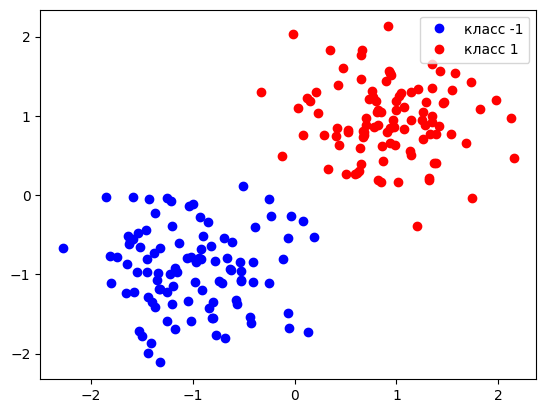

In [10]:
cols = ['blue', 'red']

# построение точек
for k in np.unique(y):
    if k == -1: col = cols[0]
    elif k ==1 : col = cols[1]
    plt.plot(X[y==k,0], X[y==k,1], 'o', label='класс {}'.format(k), color=col)

plt.legend(loc='best')
plt.show()


SVM

Функция потерь
$$L_i=\begin{equation}
\left\{ 
  \begin{aligned}
    0 ,  y_i*f(x_i) \le 1\\
    1- y_i * f(x_i), y_i*f(x_i) < 1 \\
  \end{aligned}
  \right.
\end{equation}
$$
Add regularization
$$ J= \lambda * {<w>}^2 + \frac{1}{l} \sum_{i = 1}^l L_i $$
if $y_i * f(x_i) \ge 1$: $$J_i = \lambda {<w>}^2 $$ 
else $$ J_i = \lambda {<w>}^2  + 1 - y_i(w*x_i -w_0)$$

Gradients
$$\frac{dJ_i}{dw} = \begin{equation}
\left\{ 
  \begin{aligned}
    2*\lambda * w ,   \\
    2*\lambda * w - y_i*x_i,   \\
  \end{aligned}
  \right.
\end{equation}$$
$$\frac{dJ_i}{dw_0} = \begin{equation}
\left\{ 
  \begin{aligned}
    0 ,   \\
    y_i,   \\
  \end{aligned}
  \right.
\end{equation}$$
Update rule
$$w = w -\alpha * dw$$
$$w_0= w_0-\alpha*dw_0$$

In [ ]:
class SVM:
    def __init__(self, lr= 1, lambda_param = 0, iterations=1000):
        self.lr = lr
        self.lamda_param = lambda_param
        self.iterations= iterations
        self.w= None
        self.w0 = 0
    def fit(self, X, y):
        self.w = np.zeros(len(X))
        
        for _ in range(self.iterations):
            for i, x_i in enumerate(X):
                condition = y[i] * (np.dot(x_i, self.w) - self.w0) >=1
                if condition:
                    self.w -= self.lr * (2* self.lamda_param *self.w)
                else:
                    self.w -= self.lr * (2* self.lamda_param* self.w - np.dot(x_i, y[i]))
                    self.w0 -= self.lr * y[i]
    def predict(self, X):
        approx = np.dot(X, self.w- self.w0)
        return np.sign(approx)
    def show_graph():
        pass